<a href="https://colab.research.google.com/github/Anaghak17/Statistical-Method-for-Predicting-Bankruptcy-using-Machine-Learning/blob/main/Statistical%20Method%20for%20Predicting%20Bankruptcy%20using%20Machine%20Learning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.io import arff
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier


          

In [ ]:
pip install xgboost
          

In [ ]:
pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=762dd347c444b3ab94e570a900a455982cdd395f2ffe952e15bce6e8052e00f6
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
def load_raw_data():
  n=5
  return [arff.loadarff('/content/drive/MyDrive/bankruptcy/data/' +str(i+1) + 'year.arff') for i in range(n)]

def convert_in_df():
  return [pd.DataFrame(data_i_year[0]) for data_i_year in load_raw_data()]

def set_headers(dataframes):
  cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
  cols.append('Y')
  for df in dataframes:
    df.columns = cols

dataframes = convert_in_df()
set_headers(dataframes)
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [ ]:
n=5
for i in range(n):
  print(dataframes[i].shape)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


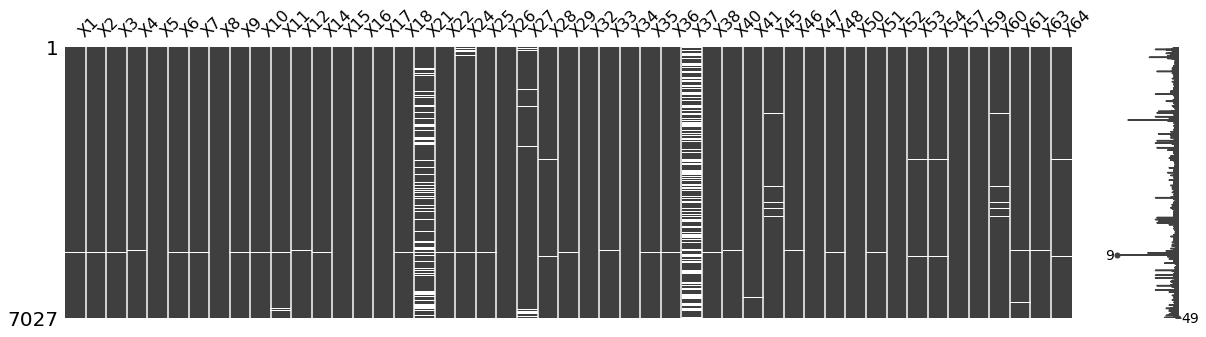

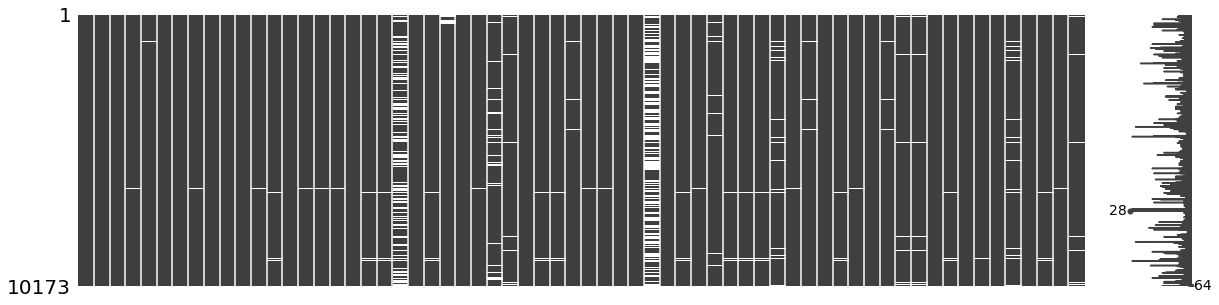

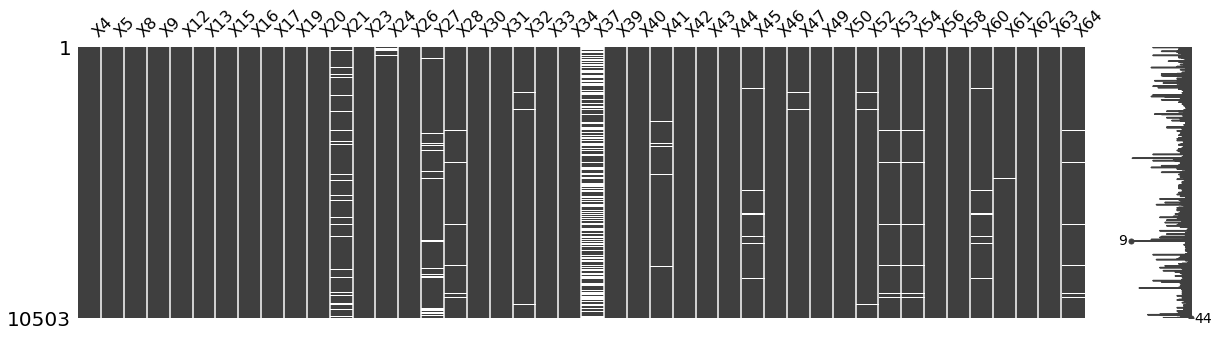

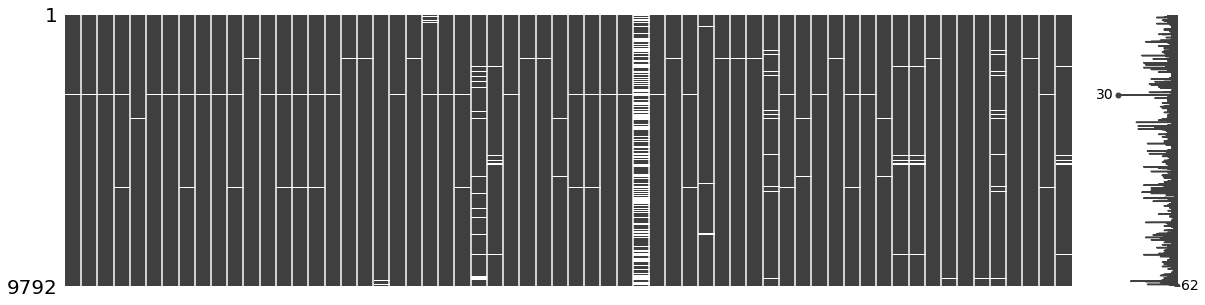

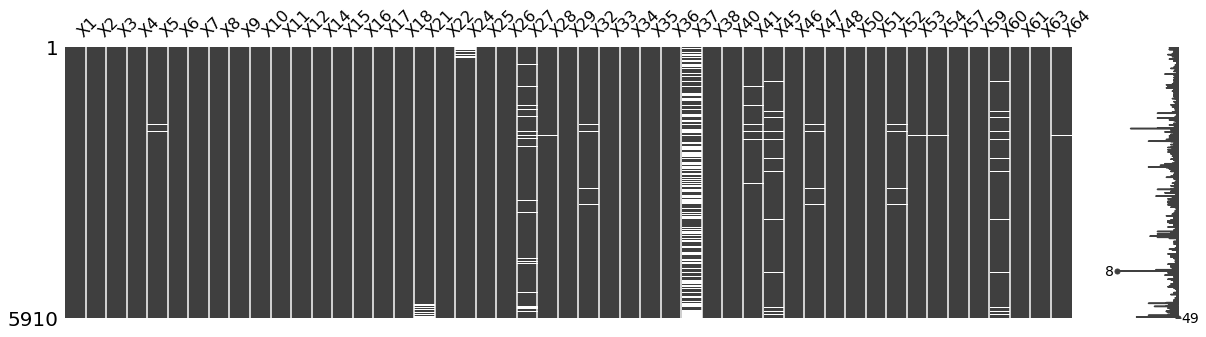

In [ ]:
for i in range(5):
  missing_df_i = dataframes[i].columns[dataframes[i].isnull().any()].tolist()
  msno.matrix(dataframes[i][missing_df_i], figsize=(20,5))

In [ ]:




+
+
++
++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


++
++++++++++++
+
+
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+

























+










imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dataframes]
for i in range(len(dataframes)):
  mean_imputed_dfs[i].columns = dataframes[i].columns
mean_imputed_dfs[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [ ]:
consolidatedDfs=pd.DataFrame(index=mean_imputed_dfs[0].index,columns=mean_imputed_dfs[0].columns)
#for i in range(5):
consolidatedDfs=pd.concat([mean_imputed_dfs[0],mean_imputed_dfs[1],mean_imputed_dfs[2],mean_imputed_dfs[3],mean_imputed_dfs[4]])
consolidatedDfs.head()
consolidatedDfs.shape


(43405, 65)

In [ ]:
X = consolidatedDfs.iloc[:,:-1]
Y = consolidatedDfs.iloc[:,64]

#spliting the set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
Y_test
X = mean_imputed_dfs[0].iloc[:,:-1]
Y = mean_imputed_dfs[0].iloc[:,64]

#spliting the set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
Y_test


5568    0.0
5318    0.0
5620    0.0
4132    0.0
5781    0.0
       ... 
2177    0.0
1979    0.0
3164    0.0
6431    0.0
994     0.0
Name: Y, Length: 1406, dtype: float64

In [ ]:
threshold = 1e-6

clf1 = LogisticRegression(penalty = 'none')
clf2 = LogisticRegression(penalty = 'l2')
model_list = (clf1, clf2)

for clf in model_list:
    clf.fit(X_train, Y_train)
    feature_weight = clf.coef_
    print("The validation score of model",clf.score(X_test,Y_test))
    print("The number of selected feature of model",(np.sum(abs(feature_weight) > threshold)))
listC = 10.0**np.arange(-4,4)
parameter = {'C':listC}
lr = LogisticRegression(penalty = 'l2')
clf = GridSearchCV(lr, parameter)

clf.fit(X_train, Y_train)
print("The best parameter is",clf.best_params_)
print("The best score is",clf.best_score_)
lr = LogisticRegression(penalty = 'l2', C = 0.001)
lr.fit(X_train, Y_train)
print("Training score of Logistic Regression model is",lr.score(X_train, Y_train))
print("Testing score of Logistic Regression model is",lr.score(X_test, Y_test))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

The validation score of model 0.957325746799431
The number of selected feature of model 64
The validation score of model 0.957325746799431
The number of selected feature of model 64


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

The best parameter is {'C': 1.0}
The best score is 0.9615726374060893
Training score of Logistic Regression model is 0.962106386763921
Testing score of Logistic Regression model is 0.957325746799431


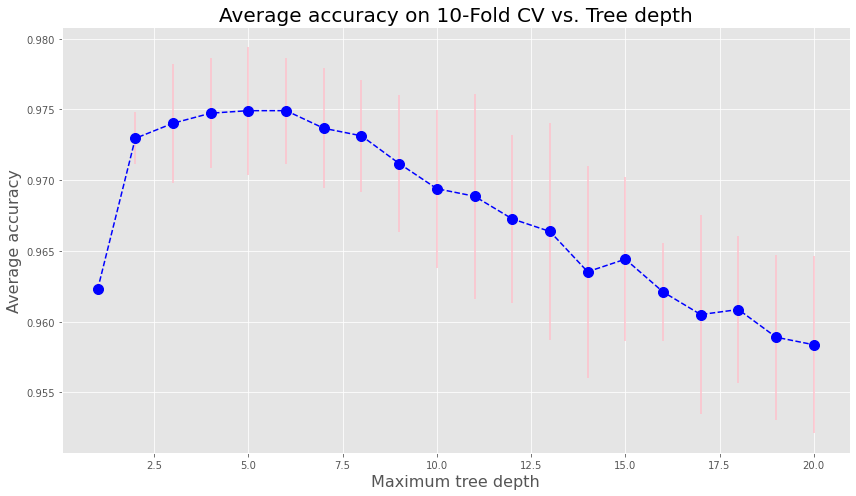

In [ ]:
maxDepth = 20
kFold = 5
scores = np.zeros((maxDepth, kFold))

for depth in np.arange(1, maxDepth + 1):
    model_Dtree = DecisionTreeClassifier(max_depth=depth)
    scores[depth - 1] = cross_val_score(model_Dtree, X_train, Y_train, cv=kFold)
plt.style.use('ggplot')
plt.errorbar(range(1, maxDepth + 1), np.average(scores, axis=1), 
             color='blue', linestyle='--', marker='o', markersize=10, 
             yerr=np.std(scores, axis=1), ecolor='pink', 
             capthick=2)
plt.xlabel("Maximum tree depth", fontsize = 16)
plt.ylabel("Average accuracy", fontsize = 16)
plt.title("Average accuracy on 10-Fold CV vs. Tree depth", 
          fontsize = 20)
plt.gcf().set_size_inches(12, 7)
plt.tight_layout()
#plt.savefig('img/tree1.png')

Training score of Decision Tree Classifier is 0.9770503469133606
Testing score of Decision Tree Classifier is 0.972972972972973


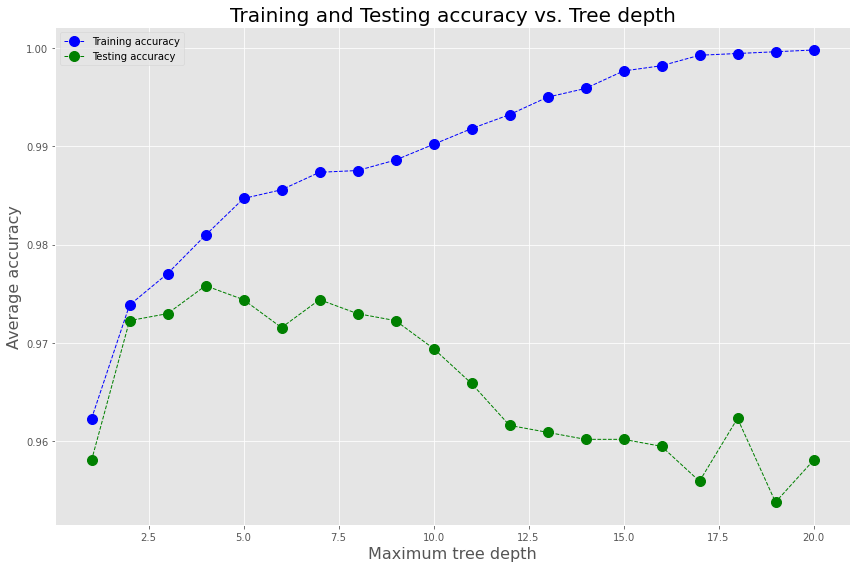

In [ ]:
trainging_scores = np.zeros((maxDepth, 1))
testing_scores = np.zeros((maxDepth, 1))

for depth in np.arange(1, maxDepth + 1):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, Y_train)
    trainging_scores[depth - 1] = clf.score(X_train, Y_train)
    testing_scores[depth - 1] = clf.score(X_test, Y_test)
plt.style.use('ggplot')
plt.plot(range(1, maxDepth + 1), trainging_scores, 'o--', 
         markersize=10, color='blue', lw=1, label='Training accuracy')
plt.plot(range(1, maxDepth + 1), testing_scores, 'o--',
         markersize=10, color='green', lw=1, label='Testing accuracy')
plt.xlabel("Maximum tree depth", fontsize = 16)
plt.ylabel("Average accuracy", fontsize = 16)
plt.title("Training and Testing accuracy vs. Tree depth", 
          fontsize = 20)
plt.legend(loc="best")
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
#plt.savefig('img/tree2.png')
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)
print("Training score of Decision Tree Classifier is",clf.score(X_train, Y_train))
print("Testing score of Decision Tree Classifier is",clf.score(X_test, Y_test))

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 1. 0.]
Accuracy 0.0951111111111111 
 Precision [0.96825397 0.0433145 ] 
 Recall [0.05663881 0.95833333]
[[  61 1016]
 [   2   46]]


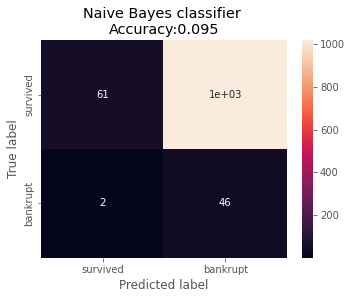

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
Accuracy 0.0898576512455516 
 Precision [0.98412698 0.03675778] 
 Recall [0.05719557 0.975     ]
[[  62 1022]
 [   1   39]]


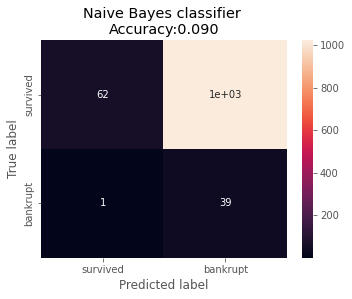

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
Accuracy 0.08362989323843416 
 Precision [0.9787234  0.04456825] 
 Recall [0.0427907  0.97959184]
[[  46 1029]
 [   1   48]]


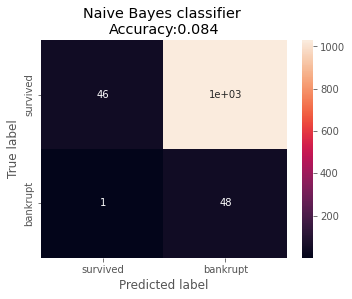

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
Accuracy 0.07473309608540925 
 Precision [1.         0.03255814] 
 Recall [0.04499541 1.        ]
[[  49 1040]
 [   0   35]]


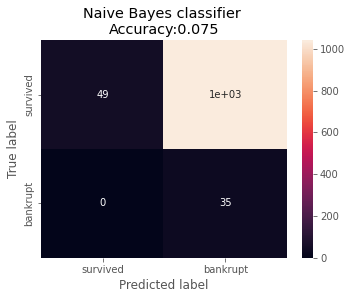

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 1.]
Accuracy 0.08629893238434164 
 Precision [0.98305085 0.03661972] 
 Recall [0.05350554 0.975     ]
[[  58 1026]
 [   1   39]]


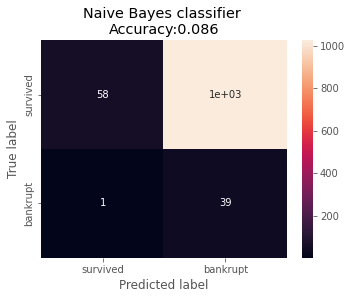

In [ ]:
def prepare_kfold_cv_data(k, X, Y, verbose=False):
    X = X.values
    Y = Y.values
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []

    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        Y_train.append(Y[train_index])
        X_test.append(X[test_index])
        Y_test.append(Y[test_index])
    return X_train, Y_train, X_test, Y_test

X_train_list, Y_train_list, X_test_list, Y_test_list = prepare_kfold_cv_data(5, X_train, Y_train)
for k_index in range(5):
                    X_train = X_train_list[k_index]
                    Y_train = Y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    Y_test = Y_test_list[k_index]
                    gnb_classifier = GaussianNB()

                    clf_model=gnb_classifier.fit(X_train, Y_train)
                    Y_test_predicted = clf_model.predict(X_test)
                    print(Y_test_predicted,Y_test)
                    
                    accuracy_gnb = accuracy_score(Y_test, Y_test_predicted, normalize=True)
                    recall_gnb = recall_score(Y_test, Y_test_predicted, average=None)
                    precision_gnb = precision_score(Y_test, Y_test_predicted, average=None)
                    confusion_matrix_gnb = confusion_matrix(Y_test, Y_test_predicted)
                    
                    print("Accuracy",accuracy_gnb ,"\n","Precision",precision_gnb,"\n","Recall",recall_gnb)
                    print(confusion_matrix_gnb)
                    confusion_matrix_gnb_df = pd.DataFrame(confusion_matrix_gnb, 
                                         index = ['survived','bankrupt'], 
                                         columns = ['survived','bankrupt'])

                    
                    plt.figure(figsize=(5.5,4))
                    sns.heatmap(confusion_matrix_gnb_df, annot=True)
                    plt.title('Naive Bayes classifier \nAccuracy:{0:.3f}'.format(accuracy_gnb))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()

Accuracy 0.9677777777777777 
 Precision [0.97072072 0.75      ] 
 Recall [0.99653179 0.25714286]
[[862   3]
 [ 26   9]]


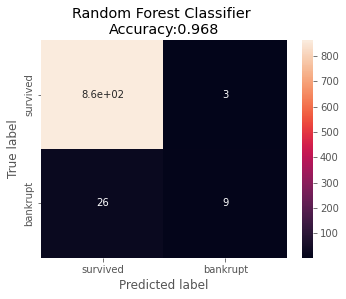

Accuracy 0.9577777777777777 
 Precision [0.95955056 0.8       ] 
 Recall [0.99766355 0.18181818]
[[854   2]
 [ 36   8]]


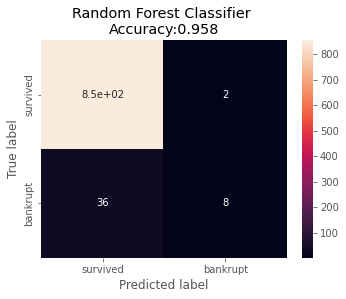

Accuracy 0.9621802002224694 
 Precision [0.96818182 0.68421053] 
 Recall [0.99300699 0.31707317]
[[852   6]
 [ 28  13]]


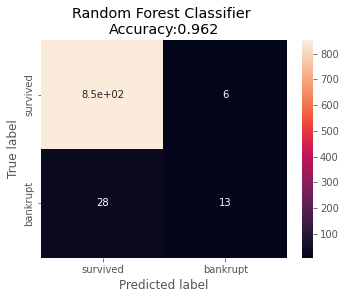

Accuracy 0.9844271412680756 
 Precision [0.98425197 1.        ] 
 Recall [1.         0.41666667]
[[875   0]
 [ 14  10]]


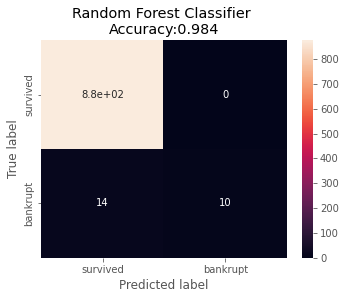

Accuracy 0.9710789766407119 
 Precision [0.97206704 0.75      ] 
 Recall [0.99885189 0.10714286]
[[870   1]
 [ 25   3]]


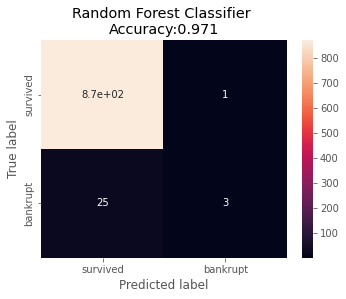

In [ ]:
def prepare_kfold_cv_data(k, X, Y, verbose=False):
    X = X
    Y = Y
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    for train_index, test_index in kf.split(X):
      X_train.append(X[train_index])
      Y_train.append(Y[train_index])
      X_test.append(X[test_index])
      Y_test.append(Y[test_index])
    return X_train, Y_train, X_test, Y_test
X_train_list, Y_train_list, X_test_list, Y_test_list = prepare_kfold_cv_data(5, X_train,Y_train)
for k_index in range(5):
                    X_train = X_train_list[k_index]
                    Y_train = Y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    Y_test = Y_test_list[k_index]
                    rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
                    clf_model=rf_classifier.fit(X_train, Y_train)
                    Y_test_predicted = clf_model.predict(X_test)
                    #print(y_test_predicted,y_test)
                    accuracy_rf = accuracy_score(Y_test, Y_test_predicted, normalize=True)
                    recall_rf = recall_score(Y_test, Y_test_predicted, average=None)
                    precision_rf = precision_score(Y_test, Y_test_predicted, average=None)
                    confusion_matrix_rf = confusion_matrix(Y_test, Y_test_predicted)
                    print("Accuracy",accuracy_rf ,"\n","Precision",precision_rf,"\n","Recall",recall_rf)
                    print(confusion_matrix_rf)
                    confusion_matrix_rf_df = pd.DataFrame(confusion_matrix_rf,index = ['survived','bankrupt'],columns = ['survived','bankrupt'])
                    plt.figure(figsize=(5.5,4))
                    sns.heatmap(confusion_matrix_rf_df, annot=True)
                    plt.title('Random Forest Classifier \nAccuracy:{0:.3f}'.format(accuracy_rf))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()

Accuracy 0.9611111111111111 
 Precision [0.96610169 0.66666667] 
 Recall [0.99418605 0.25      ]
[[684   4]
 [ 24   8]]


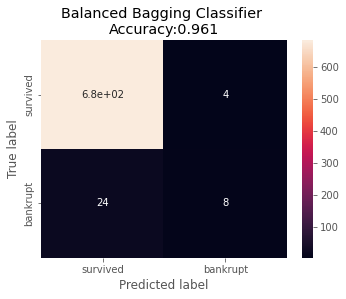

In [ ]:
def prepare_kfold_cv_data(k, X, Y, verbose=False):
    X = X
    Y = Y
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    for train_index, test_index in kf.split(X):
      X_train.append(X[train_index])
      Y_train.append(Y[train_index])
      X_test.append(X[test_index])
      Y_test.append(Y[test_index])
    return X_train, Y_train, X_test, Y_test
X_train_list, Y_train_list, X_test_list, Y_test_list = prepare_kfold_cv_data(5, X_train, Y_train)
for k_index in range(5):
                    X_train = X_train_list[k_index]
                    Y_train = Y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    Y_test = Y_test_list[k_index]
                    bb_classifier = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'), n_estimators = 5, bootstrap = True)
                    clf_model=rf_classifier.fit(X_train, Y_train)
                    Y_test_predicted = clf_model.predict(X_test)
                    #print(Y_test_predicted,Y_test)

                    accuracy_bb = accuracy_score(Y_test, Y_test_predicted, normalize=True)
                    recall_bb = recall_score(Y_test, Y_test_predicted, average=None)
                    precision_bb = precision_score(Y_test, Y_test_predicted, average=None)
                    confusion_matrix_bb = confusion_matrix(Y_test, Y_test_predicted)
                    print("Accuracy",accuracy_bb ,"\n","Precision",precision_bb,"\n","Recall",recall_bb)
                    print(confusion_matrix_bb)
                    confusion_matrix_bb_df = pd.DataFrame(confusion_matrix_bb, 
                                        index = ['survived','bankrupt'], 
                                        columns = ['survived','bankrupt'])

                    plt.figure(figsize=(5.5,4))
                    sns.heatmap(confusion_matrix_bb_df, annot=True)
                    plt.title('Balanced Bagging Classifier \nAccuracy:{0:.3f}'.format(accuracy_bb))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()